In [35]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [36]:
data = datasets.fetch_california_housing(as_frame=True)
df=data.data

In [15]:
type(df)

pandas.core.frame.DataFrame

### Identify using chart


MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

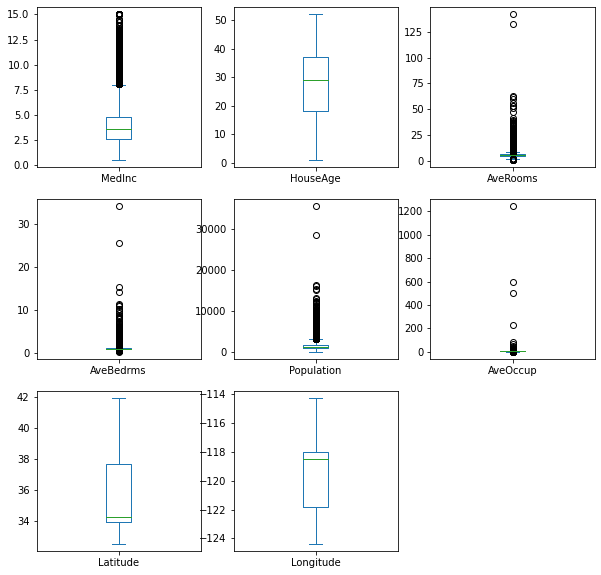

In [16]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

### Identfying outliers using IQR and Remove it

In [25]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [26]:
IQR_outliers=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [29]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

MedInc           AxesSubplot(0.125,0.657941;0.227941x0.222059)
HouseAge      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
AveRooms      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
AveBedrms        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Population    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
AveOccup      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Latitude            AxesSubplot(0.125,0.125;0.227941x0.222059)
Longitude        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

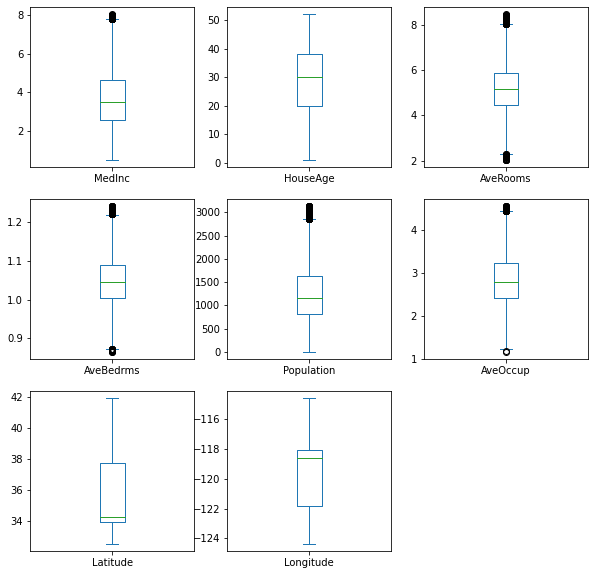

In [34]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

### Identify outliers using z-score

In [37]:
z_scores=stats.zscore(df)

In [38]:
z_scores=np.abs(z_scores)

In [41]:
filtered=df[(z_scores<3).all(axis=1)]

In [48]:
filtered.shape

(19794, 8)